Make some graphs to compare UMAP vs t-SNE

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import collections
import gzip
import numpy as np
import os
import time

# Using UKBB datasets

In [50]:
log_tsne_path = "/Users/alex/Documents/Ethnicity/scripts/logs/log_ukbb_pc10_plex30_iter20000_skl"
log_umap_path = "/Users/alex/Documents/Ethnicity/scripts/log_20000_iterations_umap_init.txt"

In [51]:
# Import lines from the log
with open(log_tsne_path) as line:
    log_tsne_contents = line.readlines()

# Keep only those with errors for iterations
log_tsne_contents = [l for l in log_tsne_contents if "Iteration" in l and "error" in l]

# Extract values: iteration number, error value, gradient norm, time
tsne_diagnostics = list()
for l in log_tsne_contents:
    tsne_diagnostics.append([l.split("Iteration ")[1].split(":")[0],
                            l.split("error = ")[1].split(",")[0],
                            l.split("gradient norm = ")[1].split(" (")[0],
                            l.split("iterations in ")[1].split("s)\n")[0]])

In [52]:
with open(log_umap_path) as line:
    log_umap_contents = line.readlines()
    
log_umap_contents = [l for l in log_umap_contents if "Iteration" in l and "error" in l]

umap_diagnostics = list()
for l in log_umap_contents:
    umap_diagnostics.append([l.split("Iteration ")[1].split(":")[0],
                            l.split("error = ")[1].split(",")[0],
                            l.split("gradient norm = ")[1].split(" (")[0],
                            l.split("iterations in ")[1].split("s)\n")[0]])

In [53]:
# Extract the errors only. Also the UMAP-seeded t-SNE hasn't finished running yet so set them to be the same size.
tsne_diagnostics_error = [float(i[1]) for i in tsne_diagnostics if int(i[0]) >= 100]
umap_diagnostics_error = [float(i[1]) for i in umap_diagnostics if int(i[0]) >= 100]
iter_vals = [int(i[0]) for i in tsne_diagnostics if int(i[0]) >= 100]

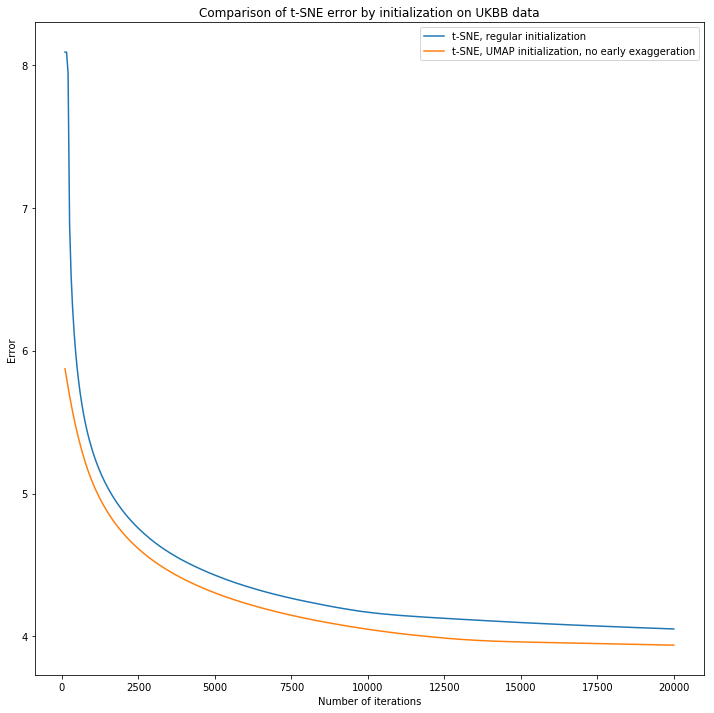

In [54]:
plt.figure(figsize=(12,12))

plt.plot(iter_vals, tsne_diagnostics_error)
plt.plot(iter_vals, umap_diagnostics_error)

plt.legend(["t-SNE, regular initialization", "t-SNE, UMAP initialization, no early exaggeration"])
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.title("Comparison of t-SNE error by initialization on UKBB data")

plt.show()

# Using 1KGP and HRS datasets

In [29]:
# Set up a function to read in a log file and give us the lists of diagnostics values.
def diagnostic_list(in_path):
    # Import data
    with open(in_path) as line:
        log_contents = line.readlines()

    # Strip down to the relevant lines
    log_conents = [l for l in log_contents if "Iteration" in l and "error" in l]
    
    diagnostics = list()
    for l in log_conents:
        diagnostics.append([l.split("Iteration ")[1].split(":")[0],
                            l.split("error = ")[1].split(",")[0],
                            l.split("gradient norm = ")[1].split(" (")[0],
                            l.split("iterations in ")[1].split("s)\n")[0]])
    
    diagnostics_error = [float(i[1]) for i in diagnostics]
    iter_vals = [int(i[0]) for i in diagnostics]
    
    return iter_vals, diagnostics_error

In [46]:
log_tsne_path = "/Users/alex/Documents/Ethnicity/scripts/logs/tsne_seeded_by_umap_HRS_5000_20181204_HHMMSS170654.txt"
log_umap_path = "/Users/alex/Documents/Ethnicity/scripts/logs/tsne_seeded_by_umap_HRS_5000_20181204_HHMMSS180814.txt"

In [47]:
hrs_tsne_iter, hrs_tsne_error = diagnostic_list(log_tsne_path)
hrs_umap_iter, hrs_umap_error = diagnostic_list(log_umap_path)

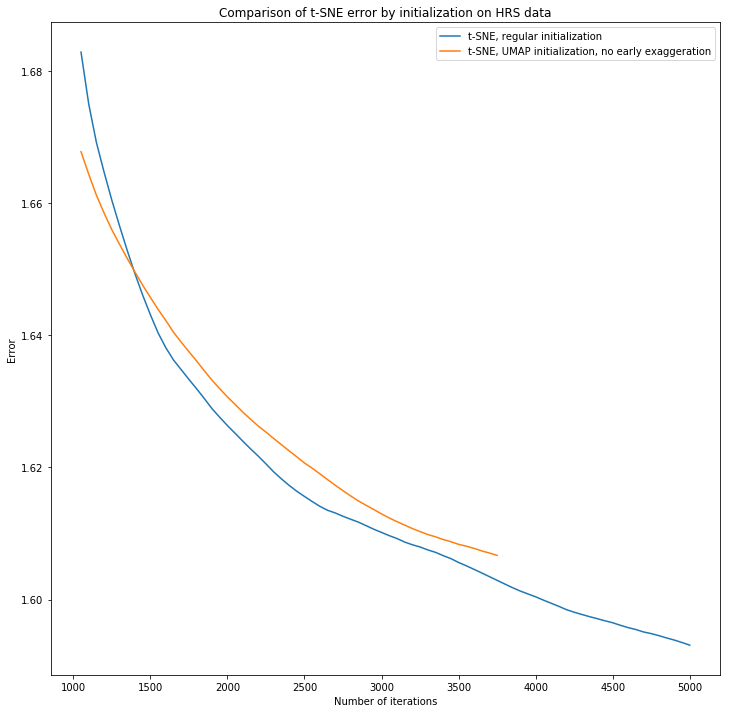

In [49]:
plt.figure(figsize=(12,12))

plt.plot(hrs_tsne_iter[20:], hrs_tsne_error[20:])
plt.plot(hrs_umap_iter[20:], hrs_umap_error[20:])

plt.legend(["t-SNE, regular initialization", "t-SNE, UMAP initialization, no early exaggeration"])
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.title("Comparison of t-SNE error by initialization on HRS data")

plt.show()

In [42]:
log_tsne_path = "/Users/alex/Documents/Ethnicity/scripts/logs/tsne_seeded_by_umap_1000G_5000_20181204_HHMMSS181521.txt"
log_umap_path = "/Users/alex/Documents/Ethnicity/scripts/logs/tsne_seeded_by_umap_1000G_5000_20181204_HHMMSS181830.txt"

In [43]:
kgp_tsne_iter, kgp_tsne_error = diagnostic_list(log_tsne_path)
kgp_umap_iter, kgp_umap_error = diagnostic_list(log_umap_path)

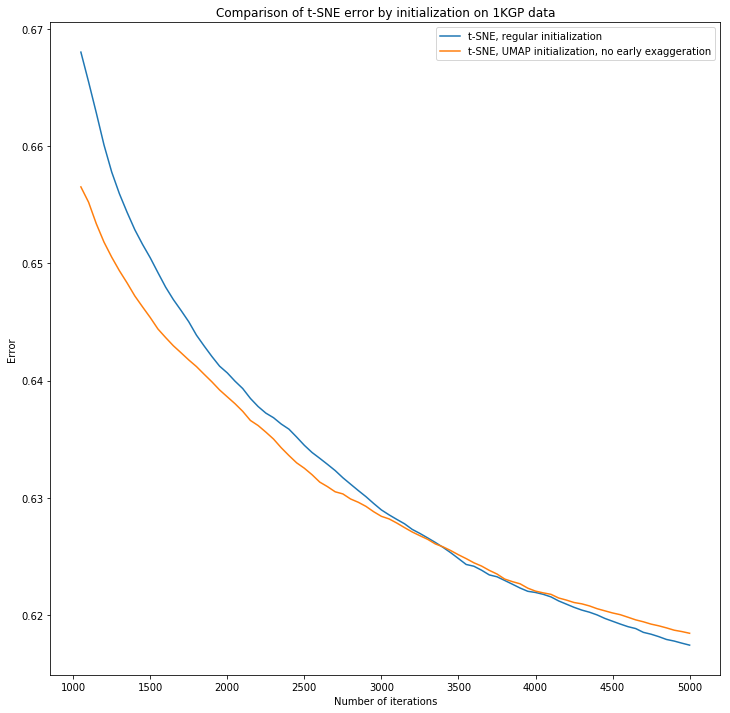

In [45]:
plt.figure(figsize=(12,12))

plt.plot(kgp_tsne_iter[20:], kgp_tsne_error[20:])
plt.plot(kgp_umap_iter[20:], kgp_umap_error[20:])

plt.legend(["t-SNE, regular initialization", "t-SNE, UMAP initialization, no early exaggeration"])
plt.xlabel("Number of iterations")
plt.ylabel("Error")
plt.title("Comparison of t-SNE error by initialization on 1KGP data")

plt.show()